In [109]:
import keras
import keras.utils
import numpy as np
import matplotlib.pyplot as plt
import keras.utils
from keras.layers import *
from tensorflow.keras.preprocessing import image
from google_drive_downloader import GoogleDriveDownloader as gdd

In [85]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [86]:
x_train.shape

(60000, 28, 28)

In [87]:
x_test.shape

(10000, 28, 28)

In [88]:
type(x_train)

numpy.ndarray

In [89]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

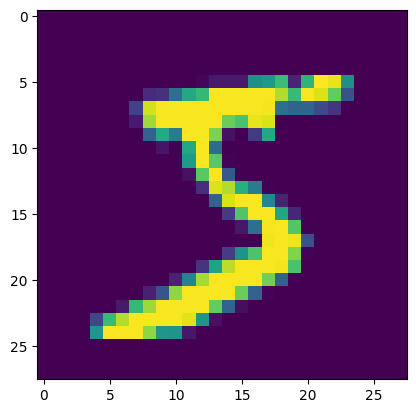

In [90]:
plt.imshow(x_train[0])

In [91]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

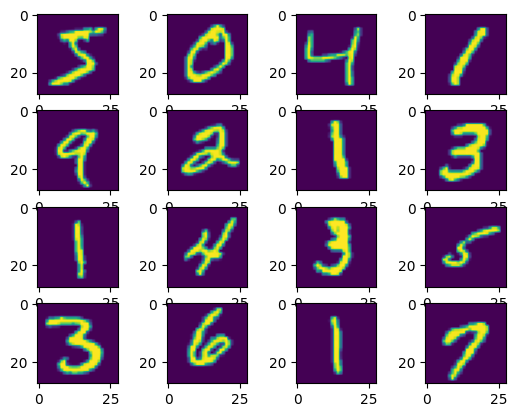

In [92]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [93]:
input_shape = (28, 28, 1)

In [94]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [95]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [96]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 9s 4ms/step - loss: 5.3095e-07 - accuracy: 0.1790
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1790
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1790
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.1790
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.1790
CPU times: user 25.9 s, sys: 1.17 s, total: 27.1 s
Wall time: 41.7 s


In [97]:
x_train = x_train / 255
x_test = x_test / 255

In [98]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [99]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [100]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [101]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3132 - accuracy: 0.9133 - val_loss: 0.1766 - val_accuracy: 0.9501
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1573 - accuracy: 0.9546 - val_loss: 0.1431 - val_accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1194 - accuracy: 0.9648 - val_loss: 0.1208 - val_accuracy: 0.9619
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0969 - accuracy: 0.9712 - val_loss: 0.1215 - val_accuracy: 0.9621
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0807 - accuracy: 0.9755 - val_loss: 0.1006 - val_accuracy: 0.9691
CPU times: user 29.6 s, sys: 2.01 s, total: 31.6 s
Wall time: 28.4 s


313/313 [==============================] - 1s 2ms/step - loss: 0.1006 - accuracy: 0.9691


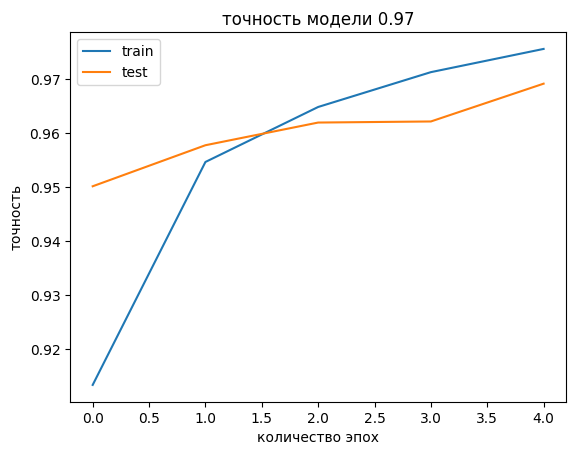

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f"точность модели {round(model_2.evaluate(x_test, y_test_cat)[1], 2)}")
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


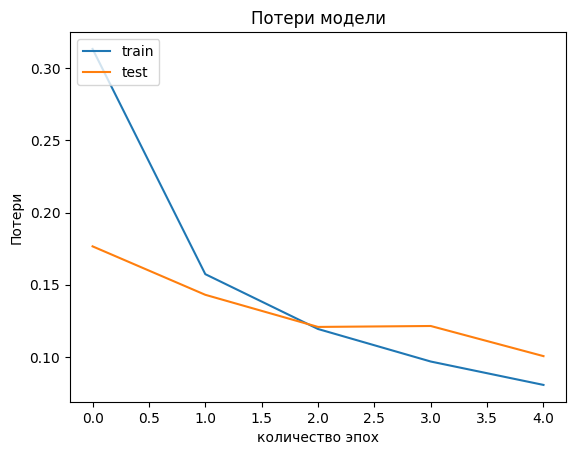

In [103]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

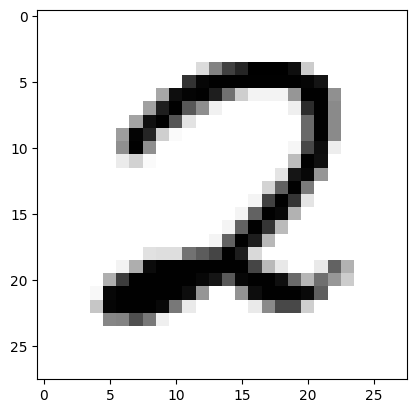

1/1 [==============================] - 0s 62ms/step
Цифра: 2


In [104]:
index = 35

plt.imshow(x_test[index].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

x = x_test[index]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])

print("Цифра:", prediction)

In [110]:
gdd.download_file_from_google_drive(file_id="1HeaifSndHECGXDeBQk8e-cbR8VWr2ArL",
                                    dest_path="./sample_data/Eight.bmp",
                                    unzip=False)

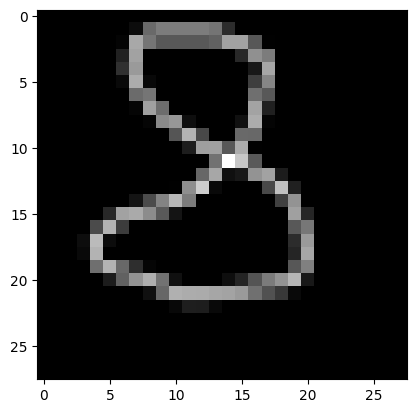

1/1 [==============================] - 0s 29ms/step
цифра: 3


In [113]:
img = image.load_img("./sample_data/Eight.bmp")

img = img.resize((28,28))
img = img.convert('L')
img = np.array(img)

plt.imshow(img, cmap=plt.cm.binary)
plt.show()

img = img.reshape(1,28,28)
img = img/255.0

prediction = model_2.predict(img)
prediction = np.argmax(prediction)
print("цифра:", prediction)